In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
import joblib
import seaborn as sns

In [2]:
folder_path = 'E:/MSc Research/MSc project/projectMSc/allRagas'
file_names = [file for file in os.listdir(folder_path) if file.endswith('.wav')]
raga_names = [name[:-9] for name in file_names]

In [3]:
print(file_names[:5])
print(raga_names[:5])

['kalyani_0001.wav', 'kalyani_0002.wav', 'kalyani_0003.wav', 'kalyani_0004.wav', 'kalyani_0005.wav']
['kalyani', 'kalyani', 'kalyani', 'kalyani', 'kalyani']


In [4]:
def features_extractor(file_or_audio, sample_rate=None):
    if isinstance(file_or_audio, str):
        audio, sample_rate = librosa.load(file_or_audio)
    else:
        audio = file_or_audio

    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs.T, axis=0)
    return mfccs_scaled_features

extracted_features = []

In [5]:
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    features = features_extractor(file_path)
    extracted_features.append([features, file_name[:-9]])

features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])
features_df.head()

,feature,class
0,"[-213.26077, 33.135113, 2.3023686, 3.8473237, ...",kalyani
1,"[-201.8888, 84.75534, -33.242752, 5.5584683, -...",kalyani
2,"[-222.60681, 87.465324, -33.947823, 6.864622, ...",kalyani
3,"[-215.5661, 67.80187, -20.391146, 22.167274, -...",kalyani
4,"[-253.9299, 111.61942, -17.701475, 13.53499, -...",kalyani


In [6]:
X = np.array(features_df['feature'].tolist())
y = np.array(features_df['class'].tolist())

In [7]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=127)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
joblib_file = "decision_tree_model.pkl"
joblib.dump(dt, joblib_file)
print(f"Model saved to {joblib_file}")



Model saved to decision_tree_model.pkl


In [10]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy * 100}%")

Test set accuracy: 68.75816993464052%


Test set F1 score: 0.6876354003375772
Confusion Matrix:
[[480  25  10  11  24  16  10  32  21  25   7]
 [ 27 676  17  13  24  13  17  18  39  47  29]
 [ 21  23 258   6  19  10   7  12  21  14  11]
 [  8  12   5 235   7   5   2  15  26  14   8]
 [ 14  13   7   4 305  11   7  28  20  18   9]
 [ 27   9   6   2   7 130   8  10  20  16   6]
 [ 11  26   5   1   6   6 284   8   9  11   3]
 [ 20  22  12  11  20  11  11 323  31  14   8]
 [ 30  35  18  18   8  13  17  29 454  29  11]
 [ 26  37  21   7  11  11  20  18  35 387  17]
 [  6  19   6   5   9   8  12   9  17  12 150]]


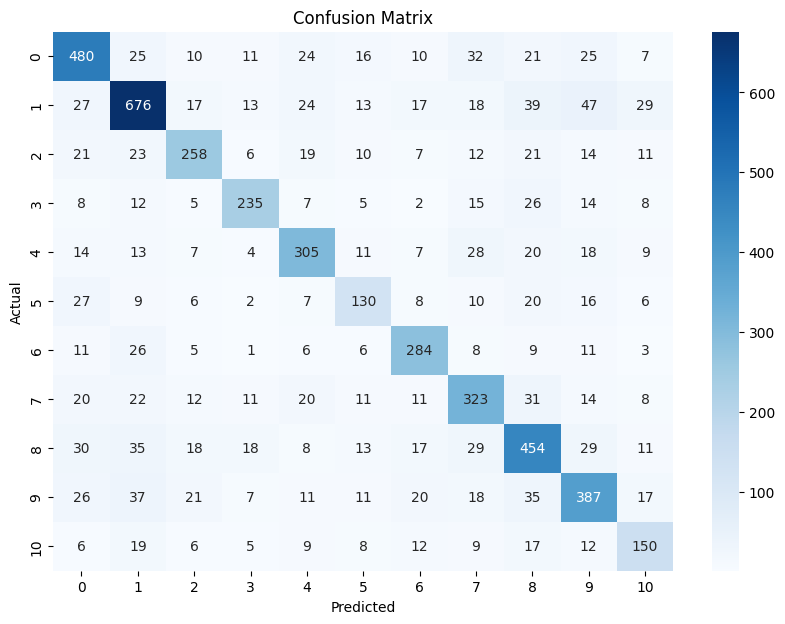

In [11]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Test set F1 score: {f1}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



In [12]:
dt_loaded = joblib.load(joblib_file)
print("Model loaded successfully")

Model loaded successfully


In [13]:
file = "Hues of _ Abinaya Shenbagaraj _ Raghavasimhan Sa _  Vox Et Violon _ Thiruppugazh _.wav"
x, sr1 = librosa.load(file)
ipd.Audio(x, rate=sr1)

In [14]:
prediction_feature = features_extractor(file)
prediction_feature = prediction_feature.reshape(1, -1)
predicted_class_label = dt_loaded.predict(prediction_feature)
prediction_class = le.inverse_transform(predicted_class_label)
print("Predicted class:", prediction_class[0])

Predicted class: Sangaraparanam
